<a href="https://colab.research.google.com/github/SaishShinde/dat/blob/main/Parkinsons_Dat_Scans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
images = "/content/drive/MyDrive/all_2d_train"


In [8]:
folders = os.listdir(images)
print(folders)

['PD', 'HC']


In [9]:
image_data= []
labels = []

In [10]:
label_dict = {
    'HC':0,
    'PD':1
}

In [11]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [12]:
print(len(image_data),len(labels))

1097 1097


In [13]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [14]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
image1=[]
label1=[]

In [16]:
x_train = np.array(image_data)
y_train = np.array(labels)

x_test = np.array(image1)
y_test = np.array(label1)

print(x_train.shape,y_train.shape)

(1097, 512, 512, 3) (1097,)


In [17]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(1097, 512, 512, 3) (1097, 2)


In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

import numpy as np
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd

In [21]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="parkinsons_detection_DAT.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [23]:
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32, epochs=10,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 3.0345 - accuracy: 0.7538
Epoch 00001: val_loss improved from inf to 2.13878, saving model to parkinsons_detection_DAT.hdf5
31/31 [==============================] - 243s 8s/step - loss: 3.0345 - accuracy: 0.7538 - val_loss: 2.1388 - val_accuracy: 0.6364
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 1.5897 - accuracy: 0.8723
Epoch 00002: val_loss improved from 2.13878 to 1.58717, saving model to parkinsons_detection_DAT.hdf5
31/31 [==============================] - 238s 8s/step - loss: 1.5897 - accuracy: 0.8723 - val_loss: 1.5872 - val_accuracy: 0.6727
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 1.0459 - accuracy: 0.9473
Epoch 00003: val_loss improved from 1.58717 to 1.58389, saving model to parkinsons_detection_DAT.hdf5
31/31 [==============================] - 240s 8s/step - loss: 1.0459 - accuracy: 0.9473 - val_loss: 1.5839 - val_accuracy: 0.6091
Epoch 4/10
31/31 [========

In [24]:
test_images = "/content/drive/MyDrive/all_2d_val"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'HC':0,
    'PD':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)
    

['PD', 'HC']
(193, 512, 512, 3) (193, 2)


In [25]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 20s 3s/step - loss: 0.3416 - accuracy: 0.9741


[0.3415660560131073, 0.9740932583808899]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [28]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.99      0.97      0.98       131

    accuracy                           0.97       193
   macro avg       0.97      0.98      0.97       193
weighted avg       0.97      0.97      0.97       193



In [29]:
print(confusion_matrix(test_labels, pred))

[[ 61   1]
 [  4 127]]


In [108]:
labels = ['Healthy', 'Parkinson']
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/hc1.png', target_size = (512,512,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = np.expand_dims(test_image, axis=-1)

result = model.predict(test_image)
result

array([[0.99604726, 0.00477815]], dtype=float32)

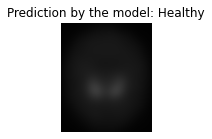

In [109]:
figure = plt.figure(figsize=(2, 2))
t_image = np.squeeze(test_image, axis=0)
t_image = np.squeeze(t_image, axis=-1)
imgUMat = cv2.imread("/content/hc1.png")
plt.imshow(imgUMat)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(result[0], axis=0)]}')
plt.show()


In [91]:
labels = ['Healthy', 'Parkinson']
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/pd1.png', target_size = (512,512,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = np.expand_dims(test_image, axis=-1)

result = model.predict(test_image)
result

array([[0.00220805, 0.9991226 ]], dtype=float32)

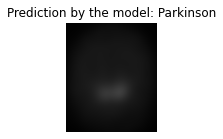

In [107]:
figure = plt.figure(figsize=(2, 2))
t_image = np.squeeze(test_image, axis=0)
t_image = np.squeeze(t_image, axis=-1)

imgUMat = cv2.imread("/content/pd1.png")
plt.imshow(imgUMat)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(result[0], axis=0)]}')
plt.show()